In [3]:
from __future__ import print_function
import spacy
from spacy.matcher import PhraseMatcher
from spacy.matcher import Matcher
import PyPDF2
import re
import pandas as pd
from io import StringIO
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

nlp = spacy.load('en_core_web_sm')
phrasematcher = PhraseMatcher(nlp.vocab)
matcher = Matcher(nlp.vocab)

myfile = open('evaldocumentV2.pdf', mode = 'rb')
pdf_text = []
pdf_reader = PyPDF2.PdfFileReader(myfile)
for p in range(pdf_reader.numPages):
    page = pdf_reader.getPage(p)
    pdf_text.append(page.extractText())
myfile.close()

list1 = pdf_text
str1 = ''.join(list1)
doc = nlp(str1)


matched_sents = []

def P_sents(phrasematcher, doc, i, pmatches, label = 'MATCH'):
    match_id, start, end = pmatches[i]
    span = doc[start : end]
    sent = span.sent

    if doc.vocab.strings[match_id] == 'computation':
        match_ents = 'computation'
        matched_sents.append({'Pattern' : match_ents, 'Requirements' : sent.text})
    elif doc.vocab.strings[match_id] == 'datadefination':
        match_ents = 'data_defination'
        matched_sents.append({'Pattern' : match_ents, 'Requirements' : sent.text})
    elif doc.vocab.strings[match_id] == 'process':
        match_ents = 'process'
        matched_sents.append({'Pattern' : match_ents, 'Requirements' : sent.text})
    elif doc.vocab.strings[match_id] == 'constraint':
        match_ents = 'constraint'
        matched_sents.append({'Pattern' : match_ents, 'Requirements' : sent.text})
    elif doc.vocab.strings[match_id] == 'assumption':
        match_ents = 'assumption'
        matched_sents.append({'Pattern' : match_ents, 'Requirements' : sent.text})
    elif doc.vocab.strings[match_id] == 'model':
        match_ents = 'model'
        matched_sents.append({'Pattern' : match_ents, 'Requirements' : sent.text})
    elif doc.vocab.strings[match_id] == 'performance':
        match_ents = 'performance'
        matched_sents.append({'Pattern' : match_ents, 'Requirements' : sent.text})
    elif doc.vocab.strings[match_id] == 'hardware':
        match_ents = 'hardware'
        matched_sents.append({'Pattern' : match_ents, 'Requirements' : sent.text})


def m_sents(matcher, doc, i, matches, label = 'MATCH'):
    match_id, start, end = matches[i]
    span = doc[start : end]
    sent = span.sent

    if doc.vocab.strings[match_id] == 'Pattern1':
        match_ents = 'Pattern1'
        matched_sents.append({'Pattern' : match_ents, 'Requirements' : sent.text})
    elif doc.vocab.strings[match_id] == 'Pattern2':
        match_ents = 'Pattern2'
        matched_sents.append({'Pattern' : match_ents, 'Requirements' : sent.text})
    elif doc.vocab.strings[match_id] == 'Pattern3':
        match_ents ='Pattern3'
        matched_sents.append({'Pattern' : match_ents, 'Requirements' : sent.text})
    elif doc.vocab.strings[match_id] == 'Pattern4':
        match_ents ='Pattern4'
        matched_sents.append({'Pattern' : match_ents, 'Requirements' : sent.text})
    elif doc.vocab.strings[match_id] == 'Pattern5':
        match_ents ='Pattern5'
        matched_sents.append({'Pattern' : match_ents, 'Requirements' : sent.text})
        
computation = ['method', 'technique', 'approach', 'algorithm']
data_defination = ['data','information','file','format']
process = ['calculate','compute','discretize', 'input', 'output']
constraint = ['constraint','restriction', 'restraint', 'limitation']
assumption = ['assume','assumption', 'hypothesis']
model = ['model','framework']
performance = ['efficient','speed', 'robust']
hardware = ['CPU','memory']

phrasematcher.add('computation', P_sents, *[nlp(text) for text in computation])
phrasematcher.add('data_defination', P_sents, *[nlp(text) for text in data_defination])
phrasematcher.add('process', P_sents, *[nlp(text) for text in process])
phrasematcher.add('constraint', P_sents, *[nlp(text) for text in constraint])
phrasematcher.add('assumption', P_sents, *[nlp(text) for text in assumption])
phrasematcher.add('model', P_sents, *[nlp(text) for text in model])
phrasematcher.add('performance', P_sents, *[nlp(text) for text in performance])
phrasematcher.add('hardware', P_sents, *[nlp(text) for text in hardware])

pattern1 = [{'POS': 'NOUN'}, {'POS': 'VERB', 'TAG' : 'MD'}]
pattern2 = [{'POS': 'NOUN'}, {'POS': 'VERB', 'TAG' : 'VBZ'}]
pattern3 = [{'POS' : 'PROPN', 'TAG' : 'NNP'}, {'POS': 'VERB', 'TAG' : 'MD'}]
pattern4 = [{'POS' : 'PROPN'}, {'POS': 'VERB', 'TAG' : 'MD'}]
pattern5 = [{'POS' : 'NOUN', 'TAG' : 'NN'},{'POS' : 'NOUN', 'TAG' : 'NNS'} ,{'POS': 'VERB', 'TAG' : 'MD'}]

matcher.add('Pattern1', m_sents, pattern1)  
matcher.add('Pattern2', m_sents, pattern2)
matcher.add('Pattern3', m_sents, pattern3)
matcher.add('Pattern4', m_sents, pattern4)
matcher.add('Pattern5', m_sents, pattern5)

pmatches = phrasematcher(doc)
matches = matcher(doc)

df = pd.DataFrame(matched_sents)
df

,Pattern,Requirements
0,model,When preparing a multilingual standard form th...
1,model,To facilitate the application of this Regulati...
2,performance,The system shall provide efficient means for f...
3,process,The system shall be able to receive the output...
4,process,The system shall be able t\no pre\n-\nprocess ...
5,model,The system shall be able t\no pre\n-\nprocess ...
6,process,The system shall be able to compute prosumer p...
7,process,The system shall be able to compute grid produ...
8,performance,Secure storage scalability and transaction spe...
9,model,"Information types produced, consumed and trans..."


In [4]:
# remove whitespaces and duplicates
for row in df.loc[:,"Requirements"]:
    df = df.replace('\n','',regex=True)

df.drop_duplicates(subset = "Requirements", keep = 'first', inplace = True)
df


,Pattern,Requirements
0,model,When preparing a multilingual standard form th...
1,model,To facilitate the application of this Regulati...
2,performance,The system shall provide efficient means for f...
3,process,The system shall be able to receive the output...
4,process,The system shall be able to pre-process the mo...
6,process,The system shall be able to compute prosumer p...
7,process,The system shall be able to compute grid produ...
8,performance,Secure storage scalability and transaction spe...
9,model,"Information types produced, consumed and trans..."
10,model,Information model:


In [5]:
df1 = df.reset_index()
df1

,index,Pattern,Requirements
0,0,model,When preparing a multilingual standard form th...
1,1,model,To facilitate the application of this Regulati...
2,2,performance,The system shall provide efficient means for f...
3,3,process,The system shall be able to receive the output...
4,4,process,The system shall be able to pre-process the mo...
5,6,process,The system shall be able to compute prosumer p...
6,7,process,The system shall be able to compute grid produ...
7,8,performance,Secure storage scalability and transaction spe...
8,9,model,"Information types produced, consumed and trans..."
9,10,model,Information model:


In [6]:
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from gensim import models
import numpy as np
from pprint import pprint
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rohan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
spacy_stopwords = spacy.lang.en.stop_words.STOP_WORDS
print('Number of stop words: %d' % len(spacy_stopwords))

Number of stop words: 305


In [7]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [8]:
data = df.Requirements.values.tolist()
pprint(data[:1])

['When preparing a multilingual standard form that is to be attached to a '
 'specific public document, the authority issuing that form should be able to '
 'select from the model for that multilingual standard form only the '
 'country-specific entry headings which are relevant for the public document '
 'concerned, in order to ensure that the multilingual standard form contains '
 'only the information included in the public document to which the form is to '
 'be attached. ']


In [9]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

data_words = list(sent_to_words(data))
print(data_words[:1])

[['when', 'preparing', 'multilingual', 'standard', 'form', 'that', 'is', 'to', 'be', 'attached', 'to', 'specific', 'public', 'document', 'the', 'authority', 'issuing', 'that', 'form', 'should', 'be', 'able', 'to', 'select', 'from', 'the', 'model', 'for', 'that', 'multilingual', 'standard', 'form', 'only', 'the', 'country', 'specific', 'entry', 'headings', 'which', 'are', 'relevant', 'for', 'the', 'public', 'document', 'concerned', 'in', 'order', 'to', 'ensure', 'that', 'the', 'multilingual', 'standard', 'form', 'contains', 'only', 'the', 'information', 'included', 'in', 'the', 'public', 'document', 'to', 'which', 'the', 'form', 'is', 'to', 'be', 'attached']]


In [10]:
# Data preprocessing 
bigram = gensim.models.Phrases(data_words, min_count=5, threshold = 100)
trigram = gensim.models.Phrases(bigram[data_words], threshold = 100)

bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

print(trigram[bigram[data_words[0]]])

['when', 'preparing', 'multilingual_standard', 'form', 'that', 'is', 'to', 'be', 'attached', 'to', 'specific', 'public', 'document', 'the', 'authority', 'issuing', 'that', 'form', 'should', 'be', 'able', 'to', 'select', 'from', 'the', 'model', 'for', 'that', 'multilingual_standard', 'form', 'only', 'the', 'country', 'specific', 'entry', 'headings', 'which', 'are', 'relevant', 'for', 'the', 'public', 'document', 'concerned', 'in', 'order', 'to', 'ensure', 'that', 'the', 'multilingual_standard', 'form', 'contains', 'only', 'the', 'information', 'included', 'in', 'the', 'public', 'document', 'to', 'which', 'the', 'form', 'is', 'to', 'be', 'attached']


In [11]:
def remove_stopwords(texts):
    doc = nlp(str(texts))
    token = [[word for word in simple_preprocess(str(doc)) if word not in spacy_stopwords] for doc in texts]
    return token

def make_bigrams(texts):
    return[bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ','VERB', 'ADV']):
    texts_out = []
    
    for sent in texts:
        doc = nlp(" ".join(sent))
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [12]:
# removing stopwords

data_words_nostops = remove_stopwords(data_words)

# creating bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

nlp = spacy.load('en_core_web_sm', disable = ['parser', 'ner'])

data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['prepare', 'multilingual_standard', 'form', 'attach', 'specific', 'public', 'document', 'authority', 'issue', 'form', 'able', 'select', 'model', 'multilingual_standard', 'form', 'country', 'specific', 'entry', 'heading', 'relevant', 'public', 'document', 'concerned', 'order', 'ensure', 'multilingual_standard', 'form', 'contain', 'information', 'include', 'public', 'document', 'form', 'attach']]


In [13]:
id2word = corpora.Dictionary(data_lemmatized)

texts = data_lemmatized

corpus = [id2word.doc2bow(text) for text in texts]

print(corpus[:1])

[[(0, 1), (1, 2), (2, 1), (3, 1), (4, 1), (5, 1), (6, 3), (7, 1), (8, 1), (9, 5), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 3), (16, 1), (17, 1), (18, 3), (19, 1), (20, 1), (21, 2)]]


In [14]:
id2word[79]

'prosumer'

In [15]:
# human readable format 
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('able', 1),
  ('attach', 2),
  ('authority', 1),
  ('concerned', 1),
  ('contain', 1),
  ('country', 1),
  ('document', 3),
  ('ensure', 1),
  ('entry', 1),
  ('form', 5),
  ('heading', 1),
  ('include', 1),
  ('information', 1),
  ('issue', 1),
  ('model', 1),
  ('multilingual_standard', 3),
  ('order', 1),
  ('prepare', 1),
  ('public', 3),
  ('relevant', 1),
  ('select', 1),
  ('specific', 2)]]

In [16]:
# Building LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [17]:
#Printing the keywords for the generated topics

pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.056*"medical" + 0.036*"new" + 0.035*"accession" + 0.035*"decide" + '
  '0.028*"notify" + 0.028*"paragraph" + 0.028*"material" + 0.026*"regard" + '
  '0.015*"body" + 0.014*"relation"'),
 (1,
  '0.029*"grant" + 0.025*"union" + 0.024*"provide" + 0.022*"act" + '
  '0.022*"outside" + 0.021*"execute" + 0.021*"system" + 0.019*"shall" + '
  '0.019*"prevail" + 0.017*"exchange"'),
 (2,
  '0.080*"member" + 0.078*"state" + 0.059*"document" + 0.055*"regulation" + '
  '0.045*"public" + 0.026*"issue" + 0.023*"person" + 0.017*"apostille" + '
  '0.016*"authority" + 0.016*"national"'),
 (3,
  '0.117*"union" + 0.052*"free" + 0.036*"circulation" + 0.030*"communicate" + '
  '0.030*"citizen" + 0.028*"simplify" + 0.028*"objective" + 0.022*"movement" + '
  '0.019*"ensure" + 0.019*"maintain"'),
 (4,
  '0.047*"authority" + 0.041*"copy" + 0.040*"certify" + 0.032*"state" + '
  '0.027*"member" + 0.024*"article" + 0.023*"document" + 0.019*"party" + '
  '0.018*"public" + 0.017*"directive"'),
 (5,
  '0.053*

In [19]:
#Visualizing the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.
 [_prepare.py:257]


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.311844 -0.033615       1        1  30.107227
4      0.125290  0.162567       2        1  17.252363
6     -0.143385  0.117075       3        1  13.091453
8      0.055213  0.107298       4        1   8.015109
9      0.098237 -0.140882       5        1   6.659482
5     -0.110936  0.029236       6        1   6.072110
7     -0.095524  0.029961       7        1   5.370151
0     -0.074821 -0.177723       8        1   4.593423
3     -0.081355 -0.098905       9        1   4.543542
1     -0.084563  0.004988      10        1   4.295146, topic_info=     Category        Freq                   Term       Total  loglift  logprob
term                                                                          
6     Default   83.000000               document   83.000000  30.0000  30.0000
260   Default   22.000000                  union   22.000000  29.0000  29.0000
18    Default   67.000000                 public   67.000000  28.0000  28.0000
38    Default   99.000000                 member   99.000000  27.0000  27.0000
44    Default  101.000000                  state  101.000000  26.0000  26.0000
2     Default   57.000000              authority   57.000000  25.0000  25.0000
54    Default   54.000000                  shall   54.000000  24.0000  24.0000
9     Default   22.000000                   form   22.000000  23.0000  23.0000
43    Default   58.000000             regulation   58.000000  22.0000  22.0000
56    Default   47.000000                 system   47.000000  21.0000  21.0000
172   Default   25.000000                request   25.000000  20.0000  20.0000
15    Default   18.000000  multilingual_standard   18.000000  19.0000  19.0000
73    Default   27.000000                 device   27.000000  18.0000  18.0000
165   Default   24.000000                   copy   24.000000  17.0000  17.0000
162   Default   23.000000                certify   23.000000  16.0000  16.0000
168   Default   20.000000                present   20.000000  15.0000  15.0000
57    Default   28.000000                  datum   28.000000  14.0000  14.0000
0     Default   29.000000                   able   29.000000  13.0000  13.0000
712   Default    9.000000                medical    9.000000  12.0000  12.0000
252   Default    8.000000                   free    8.000000  11.0000  11.0000
579   Default   14.000000                 regard   14.000000  10.0000  10.0000
12    Default   20.000000            information   20.000000   9.0000   9.0000
552   Default   13.000000              provision   13.000000   8.0000   8.0000
834   Default   10.000000                 decide   10.000000   7.0000   7.0000
177   Default   10.000000                   case   10.000000   6.0000   6.0000
277   Default   12.000000                    use   12.000000   5.0000   5.0000
106   Default    8.000000            flexibility    8.000000   4.0000   4.0000
582   Default    8.000000               contract    8.000000   3.0000   3.0000
274   Default   16.000000            requirement   16.000000   2.0000   2.0000
81    Default   12.000000                   time   12.000000   1.0000   1.0000
...       ...         ...                    ...         ...      ...      ...
320   Topic10    0.837612            improvement    1.532454   2.5436  -5.1543
442   Topic10    0.837576             compensate    1.532440   2.5436  -5.1543
449   Topic10    0.837576                  track    1.532440   2.5436  -5.1543
448   Topic10    0.837576              potential    1.532440   2.5436  -5.1543
443   Topic10    0.837576               delivery    1.532440   2.5436  -5.1543
444   Topic10    0.837576              imbalance    1.532440   2.5436  -5.1543
446   Topic10    0.837576                  local    1.532440   2.5436  -5.1543
295   Topic10    1.454634                   work    2.820648   2.4855  -4.6023
107   Topic10    1.290842                   load    2.554737   2.4650 

In [20]:
# Download File: http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip and update paths below
import os
from gensim.models.wrappers import LdaMallet
os.environ.update({'MALLET_HOME':r'C:\\Users\\python\\gensim\\mallet-2.0.8'})
mallet_path = 'C:\\Users\\python\\gensim\\mallet-2.0.8\\bin\\mallet'
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=20, id2word=id2word)

In [21]:
# Show Topics
pprint(ldamallet.show_topics(formatted=False))

# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)

[(17,
  [('access', 0.104),
   ('real_time', 0.104),
   ('platform', 0.072),
   ('dso', 0.056),
   ('description', 0.048),
   ('satisfactory', 0.04),
   ('meter', 0.04),
   ('automatic', 0.032),
   ('storage', 0.032),
   ('load', 0.032)]),
 (3,
  [('document', 0.22099447513812154),
   ('public', 0.18232044198895028),
   ('person', 0.12154696132596685),
   ('ensure', 0.04419889502762431),
   ('content', 0.03867403314917127),
   ('presentation', 0.03314917127071823),
   ('relevant', 0.027624309392265192),
   ('authority', 0.022099447513812154),
   ('change', 0.022099447513812154),
   ('optimal', 0.016574585635359115)]),
 (6,
  [('union', 0.14093959731543623),
   ('accordance', 0.0738255033557047),
   ('set', 0.06711409395973154),
   ('aggregator', 0.04697986577181208),
   ('base', 0.04697986577181208),
   ('free', 0.04697986577181208),
   ('objective', 0.040268456375838924),
   ('circulation', 0.03355704697986577),
   ('provision', 0.03355704697986577),
   ('order', 0.026845637583892617)

In [22]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [23]:

model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=3, limit=18, step=3)

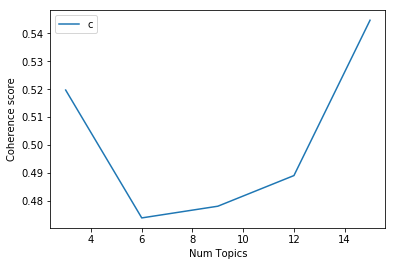

In [24]:
limit=18; start=3; step=3;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [25]:
# coherence values for respective topic models
x = range(start, limit, step)
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 3  has Coherence Value of 0.5197
Num Topics = 6  has Coherence Value of 0.474
Num Topics = 9  has Coherence Value of 0.4782
Num Topics = 12  has Coherence Value of 0.4891
Num Topics = 15  has Coherence Value of 0.5446


In [26]:
# Select the model and print the topics
optimal_model = model_list[0]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(0,
  '0.090*"system" + 0.051*"datum" + 0.024*"device" + 0.019*"energy" + '
  '0.018*"receive" + 0.017*"access" + 0.015*"process" + 0.014*"exchange" + '
  '0.014*"real_time" + 0.012*"production"'),
 (1,
  '0.089*"state" + 0.086*"member" + 0.052*"regulation" + 0.029*"information" + '
  '0.024*"request" + 0.022*"order" + 0.020*"union" + 0.019*"provide" + '
  '0.016*"flexibility" + 0.015*"application"'),
 (2,
  '0.083*"document" + 0.068*"public" + 0.049*"authority" + 0.026*"issue" + '
  '0.024*"form" + 0.021*"person" + 0.021*"multilingual_standard" + '
  '0.021*"copy" + 0.020*"certify" + 0.016*"present"')]


In [27]:
def format_topics(ldamodel=lda_model, corpus=corpus, texts=data):
    # Init output
    topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topics and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0: 
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                topics_df = topics_df.append(pd.Series([int(topic_num), topic_keywords]), ignore_index=True)
            else:
                break
    
    topics_df.columns = ['Dominant_Topic', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    topics_df = pd.concat([sent_topics_df, contents], axis=1)
 
     
    topics_df['Pattern'] = pd.Series(df1['Pattern'])
    return(sent_topics_df)
    
df_topic_sents_keywords = format_topics(ldamodel=optimal_model, corpus=corpus, texts=data)

df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Index','Topic', 'Keywords', 'Text', 'Pattern']
df_dominant_topic

,Index,Topic,Keywords,Text,Pattern
0,0,2.0,"document, public, authority, issue, form, pers...",When preparing a multilingual standard form th...,model
1,1,2.0,"document, public, authority, issue, form, pers...",To facilitate the application of this Regulati...,model
2,2,1.0,"state, member, regulation, information, reques...",The system shall provide efficient means for f...,performance
3,3,0.0,"system, datum, device, energy, receive, access...",The system shall be able to receive the output...,process
4,4,0.0,"system, datum, device, energy, receive, access...",The system shall be able to pre-process the mo...,process
5,5,0.0,"system, datum, device, energy, receive, access...",The system shall be able to compute prosumer p...,process
6,6,0.0,"system, datum, device, energy, receive, access...",The system shall be able to compute grid produ...,process
7,7,2.0,"document, public, authority, issue, form, pers...",Secure storage scalability and transaction spe...,performance
8,8,2.0,"document, public, authority, issue, form, pers...","Information types produced, consumed and trans...",model
9,9,1.0,"state, member, regulation, information, reques...",Information model:,model
